In [30]:
# Импорт библиотек
import requests
import json
import pandas as pd
import datetime
import seaborn as sns
import numpy as np

In [2]:
DATE = input('Введите необходимую дату в формате гггг-мм-дд: ')

Введите необходимую дату в формате гггг-мм-дд: 2021-06-01


In [3]:
# В этом пункте я добавлял различные обращения
#data = '{ "case": { "user_email":"spam_user123451234512345@mail.ru", "user_full_name":"supersaller123451234512345", "subject":"CNew product", "content":"Buy our super product with good price", "language_id":2, "custom_fields":{"cf_25":"some text", "cf_30":"another field"}, "labels":[101, 102] }}'

#response = requests.post('https://mvnikolay.omnidesk.ru/api/cases.json', data=data, auth=('mvnikolay@gmail.com', 'fda844fe77f02ff1025fb3f39'))


In [4]:
# Загрузим обращения (для этого был специально создан тренировочный аккаунт)
response = requests.get('https://mvnikolay.omnidesk.ru/api/cases.json', auth=('mvnikolay@gmail.com', 'fda844fe77f02ff1025fb3f39'))

In [5]:
# Посмотрим, что же в итоге вышло
response.json() 

{'0': {'case': {'case_id': 170368813,
   'case_number': '601-602276',
   'subject': 'CNew product',
   'user_id': 23542080,
   'staff_id': 0,
   'group_id': 66316,
   'status': 'closed',
   'priority': 'normal',
   'channel': 'web',
   'recipient': 'spam_user123451234512345@mail.ru',
   'cc_emails': '',
   'bcc_emails': '',
   'recipient_arr': ['spam_user123451234512345@mail.ru'],
   'cc_emails_arr': [],
   'bcc_emails_arr': [],
   'deleted': False,
   'spam': False,
   'created_at': 'Sun, 06 Jun 2021 20:10:37 +0300',
   'updated_at': 'Sun, 06 Jun 2021 20:27:24 +0300',
   'last_response_at': 'Sun, 06 Jun 2021 20:10:37 +0300',
   'parent_case_id': 0,
   'closing_speed': 17,
   'language_id': 1,
   'labels': []}},
 '1': {'case': {'case_id': 170368807,
   'case_number': '275-759169',
   'subject': 'CNew product',
   'user_id': 23542079,
   'staff_id': 0,
   'group_id': 66316,
   'status': 'closed',
   'priority': 'normal',
   'channel': 'web',
   'recipient': 'spam_user12345123451234@mail

In [6]:
todos = json.loads(response.text)

In [7]:
all_df = pd.DataFrame(todos['0']).T
for i in range(len(todos)-2):
    df = pd.DataFrame(todos['{}'.format(i + 1 )])
    all_df = pd.concat([all_df, df.T]) 
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, case to case
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   bcc_emails        25 non-null     object
 1   bcc_emails_arr    25 non-null     object
 2   case_id           25 non-null     object
 3   case_number       25 non-null     object
 4   cc_emails         25 non-null     object
 5   cc_emails_arr     25 non-null     object
 6   channel           25 non-null     object
 7   closing_speed     25 non-null     object
 8   created_at        25 non-null     object
 9   deleted           25 non-null     object
 10  group_id          25 non-null     object
 11  labels            25 non-null     object
 12  language_id       25 non-null     object
 13  last_response_at  25 non-null     object
 14  parent_case_id    25 non-null     object
 15  priority          25 non-null     object
 16  recipient         25 non-null     object
 17  recipient_arr     

In [8]:
# Поработаем с типами столбцов
all_df['created_at'] = pd.to_datetime(all_df['created_at']).apply(datetime.datetime.date).apply(pd.to_datetime)
all_df['updated_at'] = pd.to_datetime(all_df['updated_at']).apply(datetime.datetime.date).apply(pd.to_datetime)
all_df['last_response_at'] = pd.to_datetime(all_df['last_response_at']).apply(datetime.datetime.date).apply(pd.to_datetime)
all_df

,bcc_emails,bcc_emails_arr,case_id,case_number,cc_emails,cc_emails_arr,channel,closing_speed,created_at,deleted,...,parent_case_id,priority,recipient,recipient_arr,spam,staff_id,status,subject,updated_at,user_id
case,,[],170368813,601-602276,,[],web,17,2021-06-06,False,...,0,normal,spam_user123451234512345@mail.ru,[spam_user123451234512345@mail.ru],False,0,closed,CNew product,2021-06-06,23542080
case,,[],170368807,275-759169,,[],web,80,2021-06-06,False,...,0,normal,spam_user12345123451234@mail.ru,[spam_user12345123451234@mail.ru],False,0,closed,CNew product,2021-06-06,23542079
case,,[],170368801,212-427710,,[],web,16,2021-06-06,False,...,0,high,spam_user1234512345123@mail.ru,[spam_user1234512345123@mail.ru],False,0,closed,CNew product,2021-06-06,23542078
case,,[],170368799,463-618886,,[],web,65,2021-06-06,False,...,0,low,spam_user123451234512@mail.ru,[spam_user123451234512@mail.ru],False,29540,closed,CNew product,2021-06-06,23542077
case,,[],170368797,427-902058,,[],web,65,2021-06-06,False,...,0,normal,spam_user12345123451@mail.ru,[spam_user12345123451@mail.ru],False,29540,closed,CNew product,2021-06-06,23542076
case,,[],170368794,535-189486,,[],web,14,2021-06-06,False,...,0,critical,spam_user1234512345@mail.ru,[spam_user1234512345@mail.ru],False,29540,closed,CNew product,2021-06-06,23542075
case,,[],170368791,829-979029,,[],web,80,2021-06-06,False,...,0,low,spam_user123451234@mail.ru,[spam_user123451234@mail.ru],False,0,closed,CNew product,2021-06-06,23542073
case,,[],170368790,237-885415,,[],web,65,2021-06-06,False,...,0,low,spam_user12345123@mail.ru,[spam_user12345123@mail.ru],False,0,closed,CNew product,2021-06-06,23542072
case,,[],170368788,915-482333,,[],web,14,2021-06-06,False,...,0,critical,spam_user1234512@mail.ru,[spam_user1234512@mail.ru],False,29540,closed,CNew product,2021-06-06,23542071
case,,[],170368787,839-545702,,[],web,18,2021-06-06,False,...,0,normal,spam_user123451@mail.ru,[spam_user123451@mail.ru],False,0,closed,CNew product,2021-06-06,23542070


In [9]:
# Обработаем форматы всех столбцов 
all_df = all_df.astype({'case_id':'int', 'closing_speed':'int', 'deleted':'boolean', 'language_id':'int', 
                        'parent_case_id':'int', 'spam':'boolean', 'staff_id':'int', 
                        'user_id':'int'}).reset_index(drop=True)

In [10]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   bcc_emails        25 non-null     object        
 1   bcc_emails_arr    25 non-null     object        
 2   case_id           25 non-null     int32         
 3   case_number       25 non-null     object        
 4   cc_emails         25 non-null     object        
 5   cc_emails_arr     25 non-null     object        
 6   channel           25 non-null     object        
 7   closing_speed     25 non-null     int32         
 8   created_at        25 non-null     datetime64[ns]
 9   deleted           25 non-null     boolean       
 10  group_id          25 non-null     object        
 11  labels            25 non-null     object        
 12  language_id       25 non-null     int32         
 13  last_response_at  25 non-null     datetime64[ns]
 14  parent_case_id    25 non-nul

In [11]:
# Сделаем выборку по введенной ранее дате
all_df = all_df.loc[all_df['created_at'] >= DATE]
all_df

,bcc_emails,bcc_emails_arr,case_id,case_number,cc_emails,cc_emails_arr,channel,closing_speed,created_at,deleted,...,parent_case_id,priority,recipient,recipient_arr,spam,staff_id,status,subject,updated_at,user_id
0,,[],170368813,601-602276,,[],web,17,2021-06-06,False,...,0,normal,spam_user123451234512345@mail.ru,[spam_user123451234512345@mail.ru],False,0,closed,CNew product,2021-06-06,23542080
1,,[],170368807,275-759169,,[],web,80,2021-06-06,False,...,0,normal,spam_user12345123451234@mail.ru,[spam_user12345123451234@mail.ru],False,0,closed,CNew product,2021-06-06,23542079
2,,[],170368801,212-427710,,[],web,16,2021-06-06,False,...,0,high,spam_user1234512345123@mail.ru,[spam_user1234512345123@mail.ru],False,0,closed,CNew product,2021-06-06,23542078
3,,[],170368799,463-618886,,[],web,65,2021-06-06,False,...,0,low,spam_user123451234512@mail.ru,[spam_user123451234512@mail.ru],False,29540,closed,CNew product,2021-06-06,23542077
4,,[],170368797,427-902058,,[],web,65,2021-06-06,False,...,0,normal,spam_user12345123451@mail.ru,[spam_user12345123451@mail.ru],False,29540,closed,CNew product,2021-06-06,23542076
5,,[],170368794,535-189486,,[],web,14,2021-06-06,False,...,0,critical,spam_user1234512345@mail.ru,[spam_user1234512345@mail.ru],False,29540,closed,CNew product,2021-06-06,23542075
6,,[],170368791,829-979029,,[],web,80,2021-06-06,False,...,0,low,spam_user123451234@mail.ru,[spam_user123451234@mail.ru],False,0,closed,CNew product,2021-06-06,23542073
7,,[],170368790,237-885415,,[],web,65,2021-06-06,False,...,0,low,spam_user12345123@mail.ru,[spam_user12345123@mail.ru],False,0,closed,CNew product,2021-06-06,23542072
8,,[],170368788,915-482333,,[],web,14,2021-06-06,False,...,0,critical,spam_user1234512@mail.ru,[spam_user1234512@mail.ru],False,29540,closed,CNew product,2021-06-06,23542071
9,,[],170368787,839-545702,,[],web,18,2021-06-06,False,...,0,normal,spam_user123451@mail.ru,[spam_user123451@mail.ru],False,0,closed,CNew product,2021-06-06,23542070


<AxesSubplot:ylabel='Frequency'>

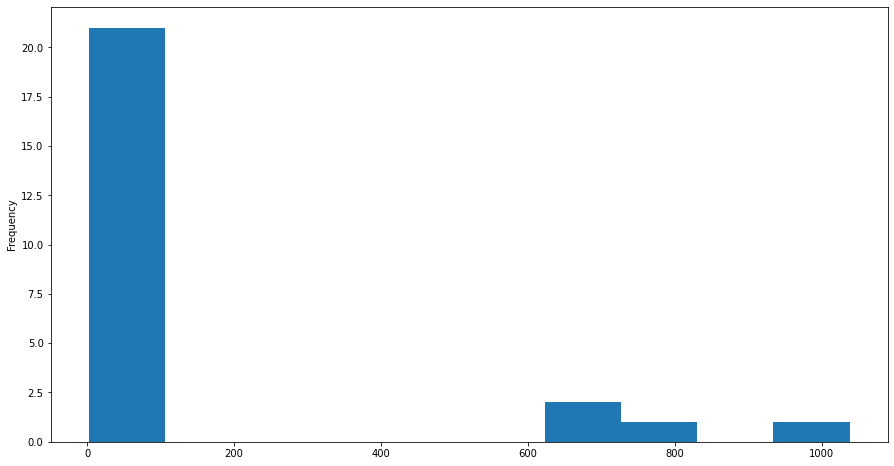

In [12]:
# Посмотрим распределение на гистограмме
all_df['closing_speed'].plot(kind='hist', figsize=(15,8), bins=10)

Основной пик приходится на скорость закрытия от 0 до 100, но есть и необычно длинные, более 600. В диапозон от 100 до 600 не попало вообще ни одно значение, на что следует обратить внимание.

<AxesSubplot:xlabel='closing_speed'>

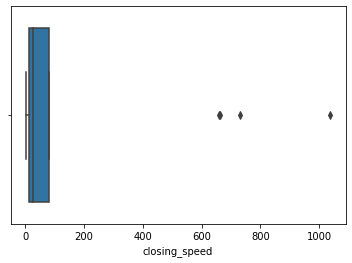

In [13]:
# Посмотрим распределения на "ящике с усами"
sns.boxplot(x=all_df['closing_speed'])

Почти все значения попали в допустимый диапозон, но можно и заметить 3 выброса, которые по значениям намного превышают средние значения.

In [14]:
all_df['closing_speed'].mean()

152.28

In [15]:
all_df['closing_speed'].median()

25.0

Среднее значение 152, медианное 25, что еще раз говорит о наличии возможных выбросов либо аномально больших значений.

Далее следует выбрать все обращения, которые не закрываются дольше всех. Можно взять все, что лежит за пределами диаграммы размаха, но тогда будут отслежены только выбросы. Этот способ не подойдет, если в значениях выбросов нет и все данные будут лежать в пределах диаграммы размаха. Можно сделать гистограмму и определить по рисунку как ведут себя данные и где они сгруппированы, чтобы от них отделить определенные значения (например, на рисунке выше можно выделить все значения больше 600). Но, опять-таки, при равномерном распределении сложно на взгляд определить, да и исчезает вся точность. Самый сложный, но максимально подходящий вариант - выбрать для каждой из категорий важности свой допустимый временной потолок и отслеживать только те данные, которые не попадают в допустимый для их важности диапозон времени (но и этот способ работает только в том случае, когда есть заранее согласованные промежутки времени, на которые следует ориентироваться).

In [16]:
# Напишем функцию, которая будет отслеживать, вовремя ли закрываются обращения

def check_time(data):
    for rows in data:
        if 'low' in data['priority']:
            if data['closing_speed'] <= 80:
                z = 0
            else: 
                z = 1
            
        elif 'normal' in data['priority']:
            if data['closing_speed'] <= 60:
                z = 0
            else:
                z = 1
            
        elif 'high' in data['priority']:
            if data['closing_speed'] <=40:
                z = 0
            else:
                z =  1
            
        elif 'critical' in data['priority']:
            if data['closing_speed'] <=20:
                z =  0
            else:
                z = 1
        else:
            z = 2
        return z   
    
        
        

In [17]:
all_df['check_speed']=all_df.apply(check_time, axis=1)

In [18]:
# Напишем функцию, которая переведет значения приоритетности к формату чисел
def prior(data):
    for rows in data:
        if 'low' in data['priority']:
            z = 1
        elif 'normal' in data['priority']:
            z = 2
        elif 'high' in data['priority']:
            z = 3
        elif 'critical' in data['priority']:
            z = 4
        return z
    
all_df['priority_int']=all_df.apply(prior, axis=1)

In [25]:
data_function = all_df.query('check_speed == 1')
data_function = data_function.sort_values(['priority_int', 'closing_speed'], ascending=[False, False]).reset_index()
data_function

,index,bcc_emails,bcc_emails_arr,case_id,case_number,cc_emails,cc_emails_arr,channel,closing_speed,created_at,...,recipient,recipient_arr,spam,staff_id,status,subject,updated_at,user_id,check_speed,priority_int
0,17,,[],170265285,876-441979,,[],web,25,2021-06-05,...,new_example@mail.ru,[new_example@mail.ru],False,0,closed,Something wrong,2021-06-05,23517276,1,4
1,20,,[],170214849,928-964600,,[],web,1038,2021-06-04,...,user@domain.ru,[user@domain.ru],False,29540,closed,I need help,2021-06-05,23504782,1,3
2,15,,[],170265331,482-670280,,[],web,658,2021-06-05,...,second_example@mail.ru,[second_example@mail.ru],False,29540,closed,Check it,2021-06-06,23517265,1,3
3,19,,[],170265232,608-288150,,[],web,662,2021-06-05,...,example@mail.ru,[example@mail.ru],False,0,closed,Help me!,2021-06-05,23517254,1,2
4,1,,[],170368807,275-759169,,[],web,80,2021-06-06,...,spam_user12345123451234@mail.ru,[spam_user12345123451234@mail.ru],False,0,closed,CNew product,2021-06-06,23542079,1,2
5,4,,[],170368797,427-902058,,[],web,65,2021-06-06,...,spam_user12345123451@mail.ru,[spam_user12345123451@mail.ru],False,29540,closed,CNew product,2021-06-06,23542076,1,2
6,11,,[],170368781,604-899629,,[],web,65,2021-06-06,...,spam_user1234@mail.ru,[spam_user1234@mail.ru],False,0,closed,CNew product,2021-06-06,23542068,1,2
7,16,,[],170265296,273-753228,,[],web,729,2021-06-05,...,new_example@mail.ru,[new_example@mail.ru],False,29540,closed,Alert,2021-06-05,23517276,1,1


Итак, при помощи функции мы выбрали те значения, у которых время обработки не попало в допустимой диапозон. Однако, могут быть ситуации, где допустимый диапозон не известен, в таком случае придется обходиться без фукнции.

В таких условиях следует внимательно отследить распределение значений, есть ли среди них прослеживаемая тенденция и определить для себя порог значенией. В данном случае будет задейстовано 10% от всех значений.

In [26]:
head = int(np.ceil(len(all_df) * 0.1))
head

3

In [27]:
data_head = all_df.sort_values(['closing_speed'], ascending=False).head(head)

In [28]:
data_head = data_head.sort_values(['priority_int', 'closing_speed'], ascending=[False, False]).reset_index()
data_head

,index,bcc_emails,bcc_emails_arr,case_id,case_number,cc_emails,cc_emails_arr,channel,closing_speed,created_at,...,recipient,recipient_arr,spam,staff_id,status,subject,updated_at,user_id,check_speed,priority_int
0,20,,[],170214849,928-964600,,[],web,1038,2021-06-04,...,user@domain.ru,[user@domain.ru],False,29540,closed,I need help,2021-06-05,23504782,1,3
1,19,,[],170265232,608-288150,,[],web,662,2021-06-05,...,example@mail.ru,[example@mail.ru],False,0,closed,Help me!,2021-06-05,23517254,1,2
2,16,,[],170265296,273-753228,,[],web,729,2021-06-05,...,new_example@mail.ru,[new_example@mail.ru],False,29540,closed,Alert,2021-06-05,23517276,1,1


In [41]:
with pd.ExcelWriter('D:\service_speed.xls') as writer:  
    data_head.to_excel(writer, sheet_name='Sheet_name_1')
    data_function.to_excel(writer, sheet_name='Sheet_name_2')

c:\users\mvnik\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3357: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  if (await self.run_code(code, result,  async_=asy)):


## Вывод:
Итак, у нас есть файл __service_speed.xls__, находящийся в директории __"D:\ "__, в котором хранятся два листа. Первый лист - список обращений, отсортированный и составляющий примерно 10% от количества всех обращений (в случае с большим количеством обращений - процентное соотношение можно уменьшать). Во втором листе находятся те обращения, которые мы сохранили при помощи созданной нами функции.